### Import Required Library

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [27]:
# file location
database_loc = 'A_NEWLY_HIRED_DATA_ANALYST/'

Raw_2_NAICS_Files = ['RTRA_Employ_2NAICS_97_99.csv', 
              'RTRA_Employ_2NAICS_00_05.csv', 
              'RTRA_Employ_2NAICS_06_10.csv', 
              'RTRA_Employ_2NAICS_11_15.csv',
              'RTRA_Employ_2NAICS_16_20.csv']

Raw_3_NAICS_Files =  ['RTRA_Employ_3NAICS_97_99.csv', 
                'RTRA_Employ_3NAICS_00_05.csv', 
                'RTRA_Employ_3NAICS_06_10.csv', 
                'RTRA_Employ_3NAICS_11_15.csv',
                'RTRA_Employ_3NAICS_16_20.csv']

Raw_4_NAICS_Files =  ['RTRA_Employ_4NAICS_97_99.csv', 
                'RTRA_Employ_4NAICS_00_05.csv', 
                'RTRA_Employ_4NAICS_06_10.csv', 
                'RTRA_Employ_4NAICS_11_15.csv',
                'RTRA_Employ_4NAICS_16_20.csv']

LMO_detailed_file = 'LMO_Detailed_Industries_by_NAICS.xlsx'

OUTPUT_file = 'Data_Output_Template.xlsx'


#### Function Defination for Reading and Cleaning Raw Data

In [28]:
#define function for reading raw data file
def Read_Raw_Datafile(file_loc, files):
    output_df = pd.DataFrame()
    
    for file in files:
        df = pd.read_csv(file_loc + file)
        output_df = output_df.append(df, ignore_index = True)
    return output_df

In [29]:
# function defination for cleaning raw_data_file
def Clean_Raw_Data(df):
    df['NAICS_Codes'] = df.NAICS\
                               .map(lambda x:x.split('[')[1].strip(']').replace('-', ','))
    df = df.drop(columns = 'NAICS', axis = 1)[df.SYEAR < 2019]
    return df

In [30]:
# function defination for Rading and Cleaning Raw Data File
def Read_and_Clean_Data(file_loc, files):
    
    # Reading Raw Datafile
    Raw_df = Read_Raw_Datafile(file_loc, files)
    
    # Cleaning Raw Datafile
    Cleaned_df = Clean_Raw_Data(Raw_df)
    return Cleaned_df

### Read and Clean 2 NAICS Raw File

In [31]:
# Reading Raw 2NAICS file and clean the data
NAICS_2_df = Read_and_Clean_Data(database_loc, Raw_2_NAICS_Files)
NAICS_2_df.head()

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_Codes
0,1997,1,129250,72
1,1997,1,58500,56
2,1997,1,62250,11
3,1997,1,38750,71
4,1997,1,118000,23


### Read and Clean 3 NAICS Raw file

In [32]:
NAICS_3_df = Read_Raw_Datafile(database_loc, Raw_3_NAICS_Files)
NAICS_3_df = NAICS_3_df[NAICS_3_df.NAICS.map(lambda x: len(re.findall('[0-9][0-9][0-9]', x))>0)]
NAICS_3_df = Clean_Raw_Data(NAICS_3_df)
NAICS_3_df.head()

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_Codes
0,1997,1,500,914
1,1997,1,24000,721
2,1997,1,56750,561
3,1997,1,17000,481
4,1997,1,40000,621


### Read and Clean 4 NAICS Raw file

In [33]:
NAICS_4_df= Read_Raw_Datafile(database_loc, Raw_4_NAICS_Files)
NAICS_4_df.rename(columns = {'NAICS':'NAICS_Codes'},inplace=True)
NAICS_4_df = NAICS_4_df[NAICS_4_df.SYEAR < 2019]
NAICS_4_df = NAICS_4_df.astype({'NAICS_Codes':'str'})
NAICS_4_df.head()

,SYEAR,SMTH,NAICS_Codes,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250


### Read LMO industry data

In [34]:
LMO_industry_data = pd.read_excel(database_loc + LMO_detailed_file)
print(LMO_industry_data.head(5))
print(LMO_industry_data.info())

                             LMO_Detailed_Industry      NAICS
0                                            Farms  111 & 112
1                    Fishing, hunting and trapping        114
2                             Forestry and logging        113
3  Support activities for agriculture and forestry        115
4                           Oil and gas extraction        211
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LMO_Detailed_Industry  59 non-null     object
 1   NAICS                  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB
None


### Clean LMO industry data

In [35]:
LMO_industry_data['NAICS_Codes'] = LMO_industry_data.NAICS.astype(str).str.replace(' & ', ',')
LMO_industry_data = LMO_industry_data.drop(columns = 'NAICS', axis = 1)
LMO_industry_data.head(5)

,LMO_Detailed_Industry,NAICS_Codes
0,Farms,"111,112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [36]:
# functin defination for adding date
def add_date(df):
    datetime_str = df.SYEAR.astype(str) + ' ' + df.SMTH.astype(str)
    df['DATE'] = pd.to_datetime(datetime_str).dt.strftime('%Y-%m')
    df.set_index('DATE', inplace = True)
    return df

In [37]:
# function defination for Merging LMO_datafile and RTRA file, 
def Merge_RTRA_and_LOM_data(cleaned_Raw_df, LMO_data):
    df = cleaned_Raw_df.merge(LMO_data, on = 'NAICS_Codes', how = 'left').dropna()
    
    # add Date Column to file
    df = add_date(df)
    return df

### Merging RTRA 2NAICS and LMO industry data

In [38]:
Output_2NAICS_df =  Merge_RTRA_and_LOM_data(NAICS_2_df, LMO_industry_data)
Output_2NAICS_df.head()

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_Codes,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,118000,23,Construction
1997-01,1997,1,89250,81,"Repair, personal and non-profit services"
1997-01,1997,1,50750,53,Real estate rental and leasing
1997-01,1997,1,9750,22,Utilities
1997-01,1997,1,72000,41,Wholesale trade


### Merging RTRA 3NAICS and LMO industry data

In [39]:
Output_3NAICS_df = Merge_RTRA_and_LOM_data(NAICS_3_df, LMO_industry_data)
Output_3NAICS_df.head()

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_Codes,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,24000,721,Accommodation services
1997-01,1997,1,17000,481,Air transportation
1997-01,1997,1,40000,621,Ambulatory health care services
1997-01,1997,1,20000,713,"Amusement, gambling and recreation industries"
1997-01,1997,1,11750,332,Fabricated metal product manufacturing


### Merging RTRA 4 RTRA NAICS data and LMO industry data

In [40]:
Output_4NAICS_df =  Merge_RTRA_and_LOM_data(NAICS_4_df, LMO_industry_data)
Output_4NAICS_df.head()

,SYEAR,SMTH,NAICS_Codes,_EMPLOYMENT_,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,3366,3500,Ship and boat building
1997-01,1997,1,5413,27000,"Architectural, engineering and related services"
1997-01,1997,1,5415,18250,Computer systems design and related services
1997-01,1997,1,5416,16250,"Management, scientific and technical consultin..."
1997-01,1997,1,6111,78250,Elementary and secondary schools


### Merging all file from 1997 - 2018

In [41]:
Output_NAICS_97_18 = pd.concat([Output_2NAICS_df, Output_3NAICS_df, Output_4NAICS_df])
Output_NAICS_97_18.head()

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_Codes,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,118000,23,Construction
1997-01,1997,1,89250,81,"Repair, personal and non-profit services"
1997-01,1997,1,50750,53,Real estate rental and leasing
1997-01,1997,1,9750,22,Utilities
1997-01,1997,1,72000,41,Wholesale trade


### Reading Output Data 

In [42]:
Output_df = pd.read_excel(database_loc + OUTPUT_file)
Output_df = add_date(Output_df)
Output_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
DATE,,,,
1997-01,1997,1,Accommodation services,NaN
1997-01,1997,1,Air transportation,NaN
1997-01,1997,1,Ambulatory health care services,NaN
1997-01,1997,1,"Amusement, gambling and recreation industries",NaN
1997-01,1997,1,"Architectural, engineering and related services",NaN


### Merging all together

In [43]:
Output_df = Output_df.merge(Output_NAICS_97_18, on = ['DATE', 'LMO_Detailed_Industry'], how = 'left')\
            .drop(columns = ['SYEAR_y', 'SMTH_y', 'Employment'], axis = 1)
Output_df.rename(columns = {'SYEAR_x': 'SYEAR', 'SMTH_x': 'SMTH', '_EMPLOYMENT_':'EMPLOYMENT'}, inplace = True)
Output_df['EMPLOYMENT'] = Output_df.EMPLOYMENT.fillna(0).astype('float64')
Output_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,EMPLOYMENT,NAICS_Codes
DATE,,,,,
1997-01,1997,1,Accommodation services,24000.0,721
1997-01,1997,1,Air transportation,17000.0,481
1997-01,1997,1,Ambulatory health care services,40000.0,621
1997-01,1997,1,"Amusement, gambling and recreation industries",20000.0,713
1997-01,1997,1,"Architectural, engineering and related services",27000.0,5413


In [44]:
Output_df.to_excel(OUTPUT_file)

## Exploratory Data Analysis

### 1. HOW DID THE EMPLOYMENT EVOLVED OVER TIME ACROSS ALL INDUSTRIES?

               mean   median
SYEAR                       
1997   21748.587571  12250.0
1998   21540.960452  12625.0
1999   22214.336158  13250.0
2000   22542.725989  14500.0
2001   22510.240113  13125.0


Text(0.5, 1.0, 'Total EMPLOYMNETS by YEARS')

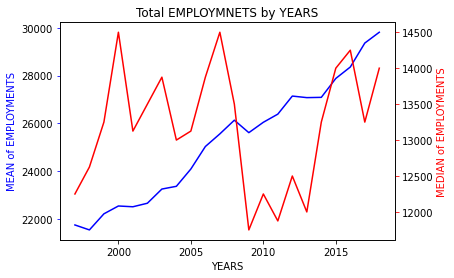

In [45]:
all_employment = Output_df.groupby('SYEAR')[['EMPLOYMENT']].agg(['mean', 'median'])
all_employment.columns = all_employment.columns.droplevel(0)
print(all_employment.head())

# lineplot
fig, ax = plt.subplots()

# plot total employment mean data
ax.plot(all_employment['mean'], color = 'b')
ax.set_xlabel('YEARS')
ax.set_ylabel('MEAN of EMPLOYMENTS', color = 'b')
ax.tick_params('y', color = 'b')

# plot total employment median data
ax2 = ax.twinx()
ax2.plot(all_employment['median'], color = 'r')
ax2.set_ylabel('MEDIAN of EMPLOYMENTS', color = 'r')
ax2.tick_params('y', color = 'r')
plt.title('Total EMPLOYMNETS by YEARS')

## What is the eolution of the employment's frequency over the months of each year? 

SYEAR,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
SMTH,,,,,,,,,,,,,,,,,,,,,
1,21250.000000,21169.491525,21847.457627,22059.322034,21690.677966,22110.169492,22601.694915,22491.525424,23343.220339,24406.779661,...,25275.423729,25144.067797,25834.745763,26372.881356,26851.694915,27241.525424,27614.406780,28084.745763,28169.491525,29322.033898
2,21072.033898,20983.050847,21961.864407,22440.677966,22220.338983,22067.796610,23148.305085,22516.949153,23436.440678,24385.593220,...,25194.915254,25245.762712,25868.644068,26597.457627,27029.661017,26995.762712,27305.084746,28334.745763,28889.830508,29288.135593
3,21338.983051,20961.864407,21796.610169,22199.152542,22631.355932,22364.406780,23347.457627,22894.067797,23152.542373,24461.864407,...,25101.694915,25661.016949,25707.627119,26944.915254,26822.033898,27144.067797,27271.186441,28292.372881,28902.542373,29300.847458
4,21288.135593,21250.000000,21707.627119,22288.135593,22275.423729,22309.322034,22872.881356,22707.627119,23614.406780,24576.271186,...,25309.322034,25919.491525,25953.389831,27279.661017,27021.186441,26707.627119,27322.033898,28305.084746,29199.152542,29478.813559
5,21961.864407,21377.118644,22084.745763,22779.661017,22932.203390,22741.525424,23216.101695,23182.203390,23944.915254,24970.338983,...,25826.271186,26021.186441,26470.338983,27203.389831,27334.745763,26885.593220,27610.169492,28398.305085,29750.000000,29728.813559


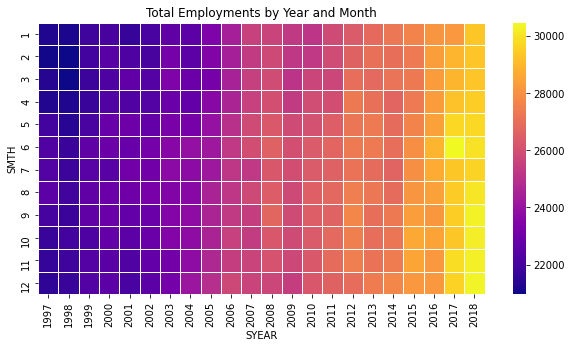

In [46]:
#employment_industry = Output_df.groupby(['SYEAR', 'LMO_Detailed_Industry'])[['SYEAR', 'LMO_Detailed_Industry', 'EMPLOYMENT']]
employment_each_month = pd.crosstab(Output_df.SMTH, Output_df.SYEAR, values = Output_df.EMPLOYMENT, aggfunc = 'mean')

# plot heatmap of employment over the month of each year
plt.figure(figsize=(10,5))
sns.heatmap(employment_each_month ,  cmap = 'plasma',linewidths = 0.5)
plt.title('Total Employments by Year and Month')
employment_each_month.head(5)

## What are the top 5 employing industries ?

Top 5 Employing Industries

 LMO_Detailed_Industry
Construction                                2.067500e+06
Food services and drinking places           1.592420e+06
Repair, personal and non-profit services    1.182784e+06
Hospitals                                   1.023557e+06
Elementary and secondary schools            1.003886e+06
dtype: float64 




Text(0.5, 1.0, 'Bar Graph for Top 5 Industries')

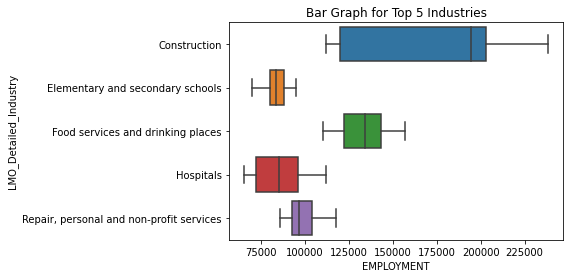

In [47]:
total_employment = pd.crosstab(Output_df.LMO_Detailed_Industry, Output_df.SYEAR, values = Output_df.EMPLOYMENT, aggfunc = sum)\
                     .mean(axis = 1)\
                     .sort_values(ascending = False)

top_employing_industries = total_employment.head(5)

print('Top 5 Employing Industries\n\n', top_employing_industries, '\n\n')

top_employment_by_year = Output_df[Output_df['LMO_Detailed_Industry'].isin(top_employing_industries.index)]
top_employment_by_year = top_employment_by_year.groupby(['LMO_Detailed_Industry', 'SYEAR'])[['EMPLOYMENT']].mean().reset_index(col_level = 1)
# box plot of top employment by year
sns.boxplot(x= 'EMPLOYMENT',y = 'LMO_Detailed_Industry', data = top_employment_by_year)
plt.title('Bar Graph for Top 5 Industries')

### Why top employing industries through out of all year?

Text(0.5, 1.0, 'Eolution of Top 5 Industries')

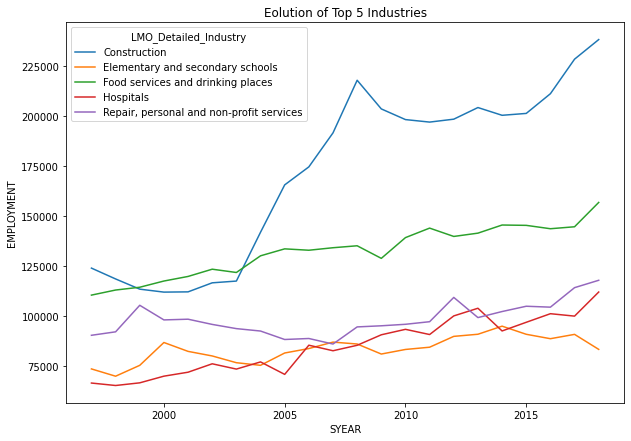

In [48]:
plt.figure(figsize=(10,7))
sns.lineplot(x = 'SYEAR', y = 'EMPLOYMENT', data = top_employment_by_year, hue = 'LMO_Detailed_Industry')
plt.title('Eolution of Top 5 Industries')

Text(0.5, 1.0, 'Comparison for Top 5 Industries and Total Industreies')

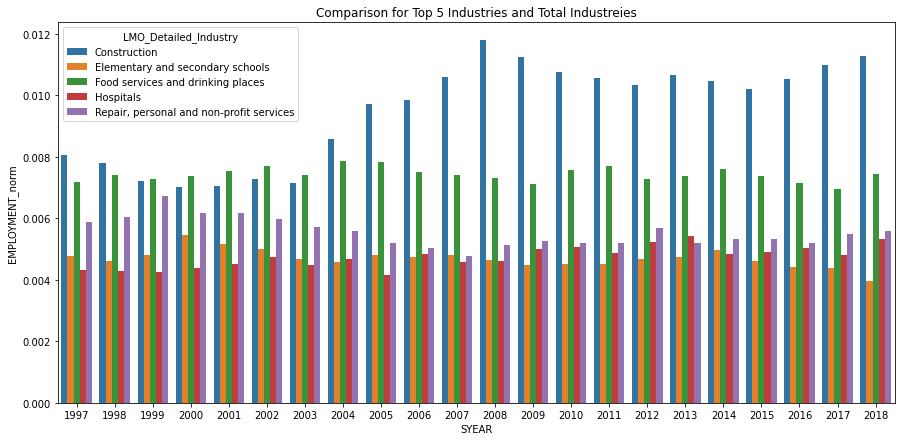

In [49]:
top_employment = top_employment_by_year.groupby(['SYEAR', 'LMO_Detailed_Industry'])[['EMPLOYMENT']].sum().reset_index(col_level = 1)
total_employment = Output_df.groupby('SYEAR')[['EMPLOYMENT']].sum()
top_employment = top_employment.merge(total_employment, how = 'left', on = 'SYEAR', suffixes= ('_top5', '_total'))
top_employment['EMPLOYMENT_norm'] = top_employment.EMPLOYMENT_top5 / top_employment.EMPLOYMENT_total

plt.figure(figsize=(15,7))
sns.barplot(x = 'SYEAR', y = 'EMPLOYMENT_norm', data = top_employment, hue = 'LMO_Detailed_Industry')
plt.title('Comparison for Top 5 Industries and Total Industreies')

### What is the eolution of the construction over the months of each year?

Text(0.5, 1.0, 'Eolution of Top 5 Industries')

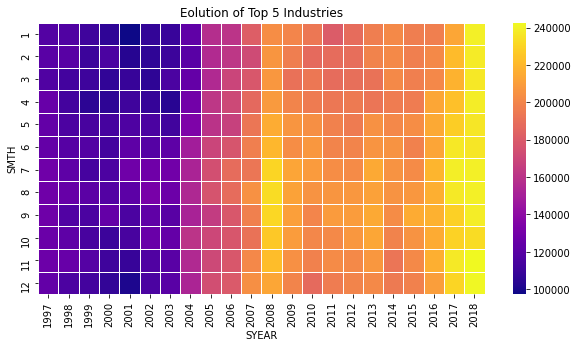

In [50]:
construction = Output_df[Output_df['LMO_Detailed_Industry'] == 'Construction']
construction_A = pd.crosstab(construction.SMTH, construction.SYEAR, values = construction.EMPLOYMENT, aggfunc = 'sum')

plt.figure(figsize=(10,5))
sns.heatmap(construction_A,  cmap = 'plasma',linewidths = 0.5)
plt.title('Eolution of Top 5 Industries')